### Code accompanying Lecture on PSO coding

Follow this with the lectures notes. 
You can change the code and data to see the effects. This will help you understand the code.

In [2]:
import numpy as np
import random
import math

In [7]:
D=2 # number of dimensions of variable
N=3 # number of particles
wmax=0.9 #inertia weight max
wmin=0.4 #inertia weight min
c1=2.05 #acceleration factor for first dimension
c2=2.05 #acceleration factor for 2nd dimension
max_iter=3 # number of iteration (loop)

In [8]:
X=np.random.rand(3,2)
print(X,end="\n\n")
print(X[:,0])
print(X[:,1])

[[0.4844733  0.25048078]
 [0.14260204 0.10454819]
 [0.76881507 0.24494371]]

[0.4844733  0.14260204 0.76881507]
[0.25048078 0.10454819 0.24494371]


In [9]:
def fun(X): #X is shape(N,D)
    x1=X[:,0]
    x2=X[:,1]
    
    out=np.power(x1,2)-x1*x2+np.power(x2,2)+2*(x1)+4*x2+3
    return out
fun(X)

array([5.14697347, 3.71975373, 5.98016261])

In [10]:
pos=np.zeros((N,D))
pos

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
Lb=-5*np.ones(D) # Lower bounds
Lb

array([-5., -5.])

In [12]:
Ub=5*np.ones(D) # Upper bounds
Ub

array([5., 5.])

In [13]:
i=0 # we initialize the first particles
for j in range(D):
        pos[i,j]=Lb[j]+(Ub[j]-Lb[j])*np.random.random();
pos

array([[ 4.99949395, -0.53628963],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [14]:
for i in range(N):
    for j in range(D):
        pos[i,j]=Lb[j]+(Ub[j]-Lb[j])*np.random.random();
pos

array([[ 4.71321626, -2.48965438],
       [ 4.81596438,  2.78556079],
       [ 4.6672758 , -2.47451581]])

### Use Vectorization to initialize Pos

In [27]:
pos=Lb+(Ub-Lb)*np.random.rand(N,D)
pos

array([[ 0.01800995,  1.34767965],
       [ 0.01733041,  2.25143119],
       [-1.9508128 , -4.26497201]])

In [28]:
# init phase 
out=np.zeros(N)
out=fun(pos)
out

array([10.21903165, 17.07061009, -4.2860188 ])

In [ ]:
#direct assignment only copy references not values
Z=np.array([1,2])
C=Z
print('Orig C',C)
C[0]=99
print('C',C)
print('Z',Z) # Z also change 

In [16]:
pbestval=np.copy(out)
pbest=np.copy(pos)

In [17]:
fminval=np.min(out)
print(out)
print(fminval)

[42.61488094 41.31187219 41.89242795]
41.31187219078661


In [18]:
index=np.argmin(out, axis=0)
index

1

In [19]:
print('pbest\n',pbest)
gbest=pbest[index]
print('\n')
print('out',out,index)
print(gbest, fminval)

pbest
 [[ 4.71321626 -2.48965438]
 [ 4.81596438  2.78556079]
 [ 4.6672758  -2.47451581]]


out [42.61488094 41.31187219 41.89242795] 1
[4.81596438 2.78556079] 41.31187219078661


<IPython.core.display.Javascript object>


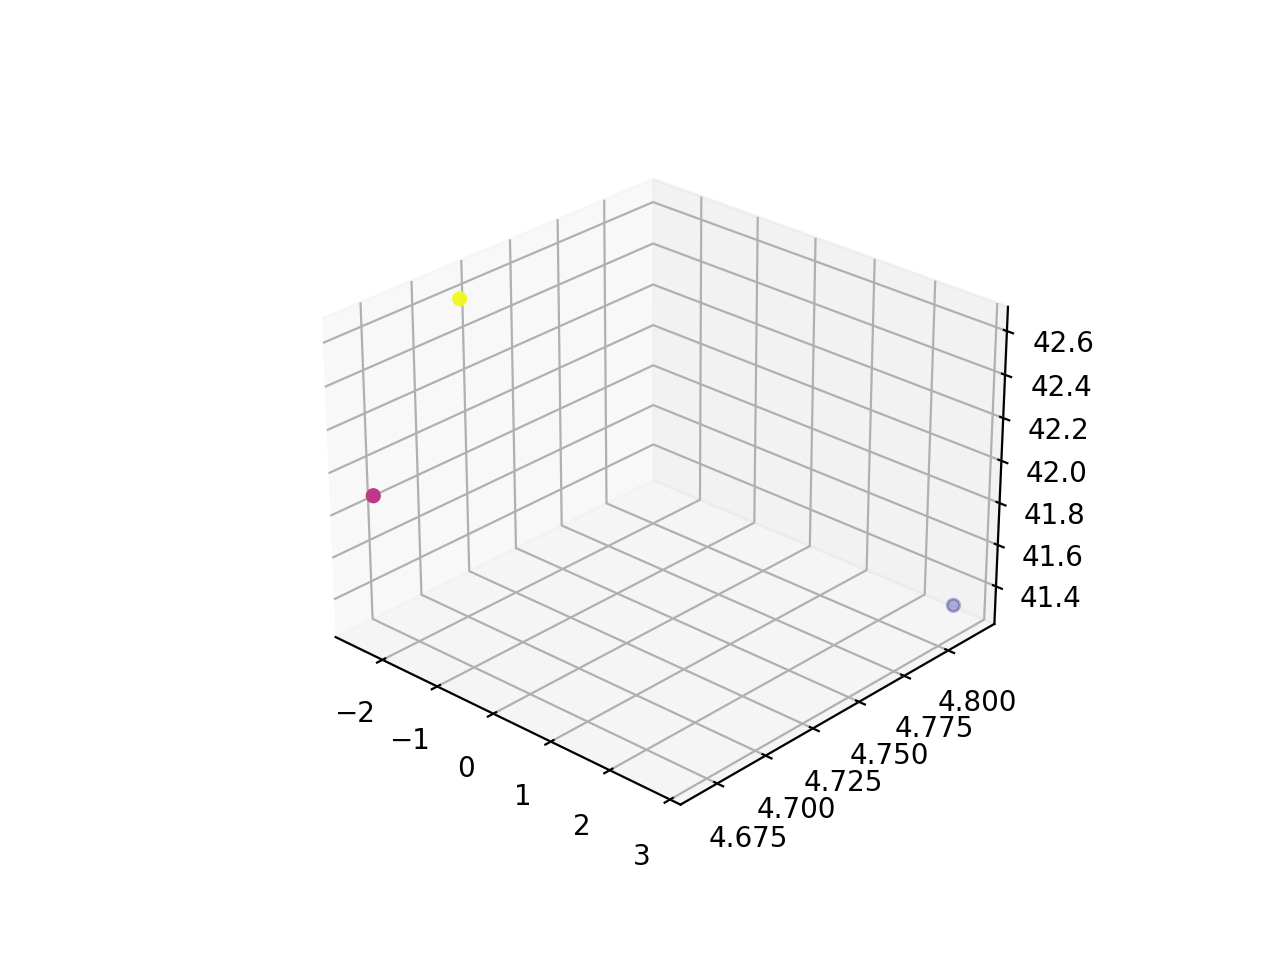

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter3D(pbest[:,1], pbest[:,0], out, c=out, cmap='plasma');

In [21]:
out[0]=0 #hardcode one value
pbestval[0]=1
print(pbestval)
print(out)
arr=np.where(out<pbestval)
pbest[arr]=np.copy(pos[arr])
pbestval[arr]=np.copy(out[arr])
print(arr)
print()
print(pbest)
print(pos)

[ 1.         41.31187219 41.89242795]
[ 0.         41.31187219 41.89242795]
(array([0], dtype=int64),)

[[ 4.71321626 -2.48965438]
 [ 4.81596438  2.78556079]
 [ 4.6672758  -2.47451581]]
[[ 4.71321626 -2.48965438]
 [ 4.81596438  2.78556079]
 [ 4.6672758  -2.47451581]]


In [5]:
prev=np.array([11,12,3,4,5])
curr=np.array([2,3,1,3,2])
arr=np.where(prev<curr)
print(arr)

(array([], dtype=int64),)


In [6]:
curr[arr]=prev[arr]
print(curr)

[2 3 1 3 2]


In [23]:
#update gbest values
fbestval=np.min(pbestval)
ind1=np.argmin(pbestval)
if(fbestval<=fminval):
    fminval=fbestval
    gbest=pbest[ind1]
print(pbestval)
print(fbestval)
print(ind1)

[ 0.         41.31187219 41.89242795]
0.0
0


In [ ]:
#initialise velocity with a fraction of the position vector
vel=0.1*pos

In [ ]:
print(vel)
print(pos)

### Updating the Vel and Pos

Here we update  1 particle and 1 dimension at a time

In [ ]:
w=0.6
vel=0.1*pos
c1=2.05 # acceleration factor
c2=2.05 # acceleration factor

#update velocity for 1 particle, 1st dimension
i,j=0,0
vel[i,j]=w*vel[i,j]+c1*np.random.random()*(pbest[i,j]-pos[i,j])+\
                    c2*np.random.random()*(gbest[j]-pos[i,j])
#update position
pos[i,j]=vel[i,j]+pos[i,j]
print(vel)
print(pos)

In [ ]:
#update velocity for 1 particle, 2nd dimension
i,j=0,1
vel[i,j]=w*vel[i,j]+c1*np.random.random()*(pbest[i,j]-pos[i,j])+\
                    c2*np.random.random()*(gbest[j]-pos[i,j])
#update position
pos[i,j]=vel[i,j]+pos[i,j]
print(vel)
print(pos)

In [ ]:
#update velocity and position phase 
for i in range(N):
    for j in range(D):
        vel[i,j]=w*vel[i,j]+c1*np.random.random()*(pbest[i,j]-pos[i,j])+\
                c2*np.random.random()*(gbest[j]-pos[i,j])
        #update position
        pos[i,j]=vel[i,j]+pos[i,j]
        #check bounds
        if(pos[i,j]<Lb[j]):
            pos[i,j]=Lb[j]
        elif (pos[i,j]>Ub[j]):
            pos[i,j]=Ub[j]

In [ ]:
out=fun(pos)
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter3D(pos[:,1], pos[:,0], out, c=out, cmap='plasma');


In [ ]:
print(gbest)
print(np.expand_dims(gbest, axis=0))

Overall concept of loops for storing current best value. We are going to work on a simple example. 

We loop a number of times and keep track of the largest random number generated.

In [ ]:
it_max=5 # loop max times 
gbest=0 #init first
it=0 #keep count of how many iteration
while it<it_max:
    #we generate a random number
    r=np.random.random()
    print(r)
    if(r>gbest):
        gbest=r #update if it is better
        print('new r is better.\n Store it: gbest=',gbest)
    
    it=it+1
print('gbest',gbest)

In PSO instead of updating the a random number, we have an vel and pos updating formula.

In [ ]:
it_max=5 # loop max times 
gbest=0 #init first
it=0 #keep count of how many iteration
v=0 #store an initial value
p=0
def funx(x):
    return x/2
while it<it_max:
    r=funx(p)
    #update formula -
    v=v+np.random.random()
    p=p+v
    print(r)
    if(r<gbest):
        gbest=r #update if it is better
        print('new r is better.\n Store it: gbest=',gbest)
    
    it=it+1
print('gbest',gbest)